In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re


In [10]:
df = pd.read_csv("NickiMinaj.csv")
df.head()


,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Nicki Minaj,Only,The Pinkprint,2014.0,2014-10-28,nicki minaj yo i never fucked wayne i never fu...
1,1,Nicki Minaj,Feeling Myself,The Pinkprint,2015.0,2015-05-18,nicki minaj yo b they ready let's go beyoncé...
2,2,Nicki Minaj,Barbie Dreams,Queen (Bonus Version),2018.0,2018-08-10,uh mmm kyuh rip to big classic shit i'm loo...
3,3,Nicki Minaj,Truffle Butter,The Pinkprint,2015.0,2015-01-23,maya jane coles you know don't you yeah night ...
4,4,Nicki Minaj,Chun-Li,Queen (Bonus Version),2018.0,2018-04-12,ayo look like i'm goin' for a swim dunked on '...


In [11]:
text_columns = df.select_dtypes(include=['object']).columns
print("Text Columns:", text_columns.tolist())

Text Columns: ['Artist', 'Title', 'Album', 'Date', 'Lyric']



Analyzing column: Artist


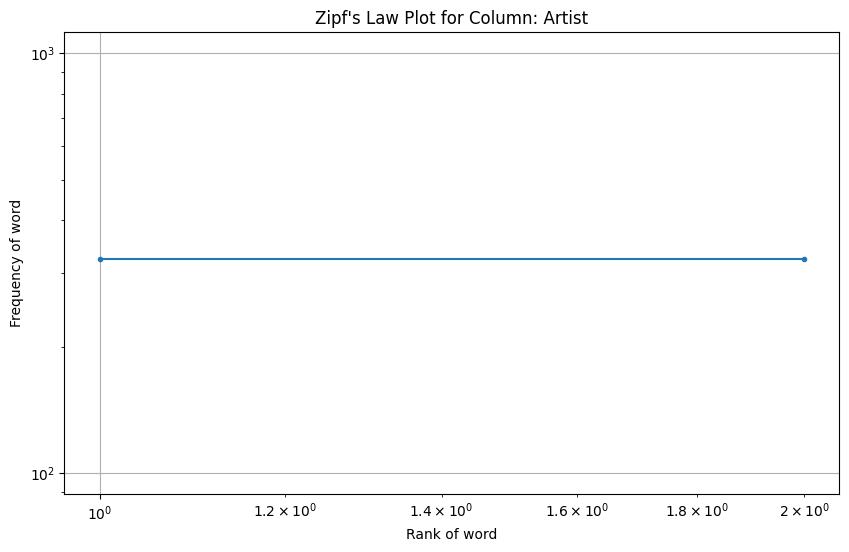


Analyzing column: Title


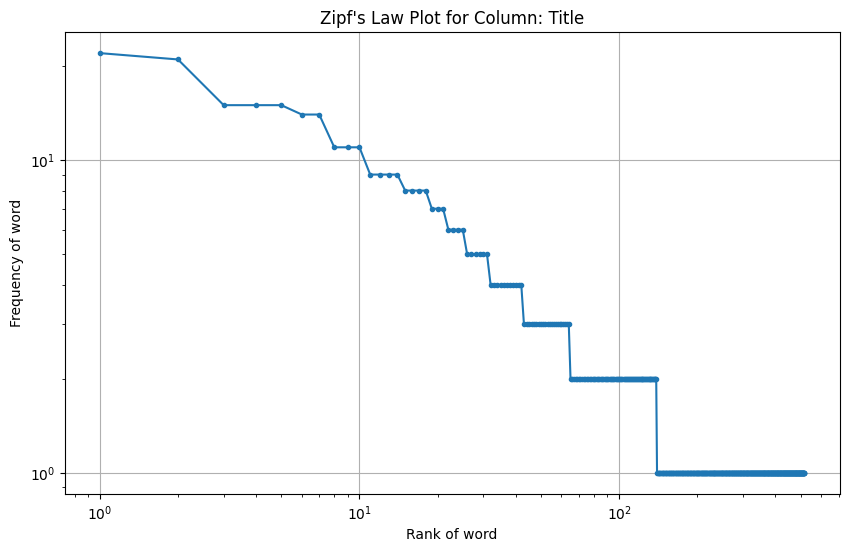


Analyzing column: Album


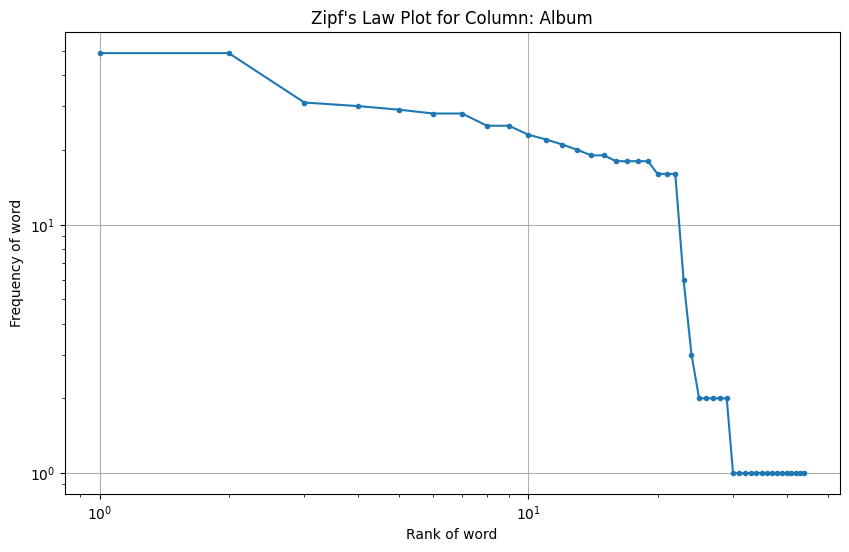


Analyzing column: Date


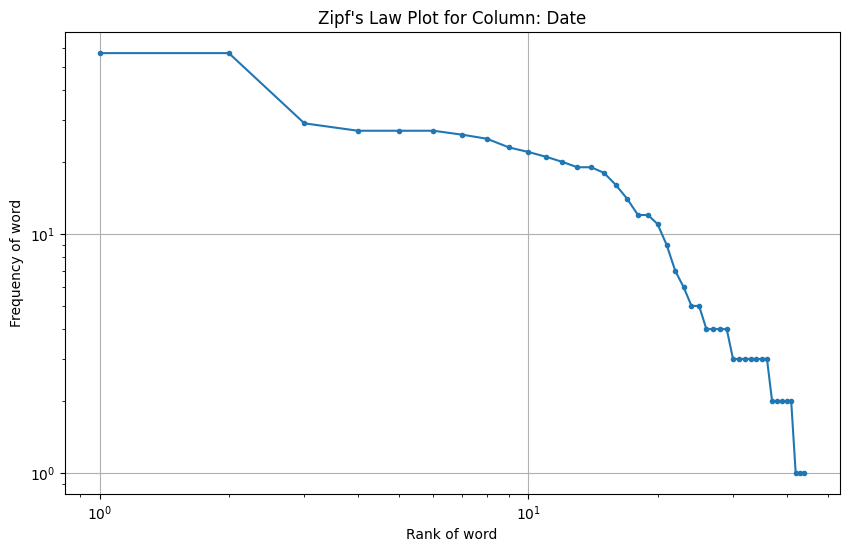


Analyzing column: Lyric


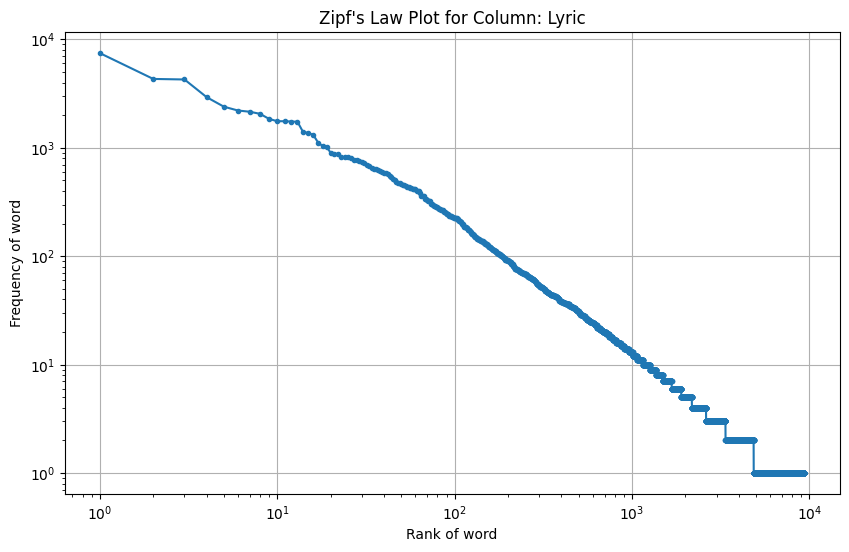

In [12]:
for column in text_columns:
    print(f"\nAnalyzing column: {column}")

    # Step 1: Combine all text from this column
    text_data = " ".join(df[column].dropna().astype(str))

    # Step 2: Tokenize words
    words = re.findall(r'\b\w+\b', text_data.lower())

    # Step 3: Count word frequencies
    word_counts = Counter(words)

    # Step 4: Sort by frequency
    sorted_counts = sorted(word_counts.values(), reverse=True)
    ranks = np.arange(1, len(sorted_counts) + 1)
    frequencies = np.array(sorted_counts)

    # Step 5: Plot Zipf's Law
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker=".")
    plt.title(f"Zipf's Law Plot for Column: {column}")
    plt.xlabel("Rank of word")
    plt.ylabel("Frequency of word")
    plt.grid(True)
    plt.show()




In [13]:
for column in text_columns:
    print(f"\nTop words in column: {column}")
    text_data = " ".join(df[column].dropna().astype(str))
    words = re.findall(r'\b\w+\b', text_data.lower())
    word_counts = Counter(words)
    top_10 = word_counts.most_common(10)

    for i, (word, freq) in enumerate(top_10, 1):
        print(f"{i}. {word}: {freq} times")





Top words in column: Artist
1. nicki: 323 times
2. minaj: 323 times

Top words in column: Title
1. i: 22 times
2. the: 21 times
3. remix: 15 times
4. minaj: 15 times
5. nicki: 15 times
6. it: 14 times
7. me: 14 times
8. in: 11 times
9. roman: 11 times
10. s: 11 times

Top words in column: Album
1. pink: 49 times
2. friday: 49 times
3. the: 31 times
4. unreleased: 30 times
5. songs: 29 times
6. roman: 28 times
7. reloaded: 28 times
8. sucka: 25 times
9. free: 25 times
10. pinkprint: 23 times

Top words in column: Date
1. 04: 57 times
2. 12: 57 times
3. 02: 29 times
4. 05: 27 times
5. 2012: 27 times
6. 07: 27 times
7. 2014: 26 times
8. 08: 25 times
9. 11: 23 times
10. 2018: 22 times

Top words in column: Lyric
1. i: 7476 times
2. the: 4321 times
3. you: 4271 times
4. a: 2934 times
5. it: 2397 times
6. my: 2210 times
7. and: 2153 times
8. me: 2059 times
9. to: 1848 times
10. m: 1761 times


In [8]:
top_10 = word_counts.most_common(10)
for i, (word, freq) in enumerate(top_10, 1):
    print(f"{i}. {word}: {freq} times")



1. i: 7498 times
2. the: 4373 times
3. you: 4279 times
4. a: 2943 times
5. it: 2411 times
6. my: 2217 times
7. and: 2157 times
8. me: 2089 times
9. to: 1850 times
10. m: 1767 times
